<img src="ml_comic.png" alt="Drawing" style="width: 300px;"/>

<h1>S09 T01: Practicing with training and test sets</h1>

In [10]:
#Python Modules
import math
from datetime import datetime, date, timedelta


#Data Manipulation
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import tqdm 

#ML 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer




**This dataset is composed by the following variables:**<br>
**Year** 2008 <br>
**Month** 1-12 <br>
**DayofMonth** 1-31 <br>
**DayOfWeek** 1 (Monday) - 7 (Sunday)<br>
**DepTime** actual departure time (local, hhmm)<br>
**CRSDepTime** scheduled departure time (local, hhmm)<br>
**ArrTime** actual arrival time (local, hhmm)<br>
**CRSArrTime** scheduled arrival time (local, hhmm)<br>
**UniqueCarrier** unique carrier code<br>
**FlightNum** flight number<br>
**TailNum** plane tail number: aircraft registration, unique aircraft identifier<br>
**ActualElapsedTime** in minutes<br>
**CRSElapsedTime** in minutes<br>
**AirTime** in minutes<br>
**ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).<br>
**DepDelay** departure delay, in minutes<br>
**Origin** origin IATA airport code<br>
**Dest** destination IATA airport code<br>
**Distance** in miles<br>
**TaxiIn** taxi in time, in minutes<br>
**TaxiOut** taxi out time in minutes<br>
**Cancelled** was the flight cancelled<br>
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) <br>
**Diverted** 1 = yes, 0 = no<br>
**CarrierDelay in minutes:** Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.<br>
**WeatherDelay in minutes:** Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.<br>
**NASDelay in minutes:** Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.<br>
**SecurityDelay in minutes:** Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br>
**LateAircraftDelay in minutes:** Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.<br>

**The dataset used in this notebook can be found in Kaggle. Use the below link to access it**
<a href="https://www.kaggle.com/datasets/giovamata/airlinedelaycauses">Airlane Delay</a>

In [11]:
data = pd.read_csv("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S03/Airline_Delay/DelayedFlights.csv",
                 parse_dates=[["Year", "Month","DayofMonth"]])

In [12]:
df = data.copy()
df.head()

,Year_Month_DayofMonth,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,0,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,4,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008-01-03,5,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

<h2>DEA</h2>

In [14]:
df.rename(columns={"Year_Month_DayofMonth":"Date"},inplace=True)
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4,628.0,620,804.0,750,WN,448,N428WN,96.0,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008-01-03,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(1936758, 27)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 27 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DayOfWeek          int64         
 2   DepTime            float64       
 3   CRSDepTime         int64         
 4   ArrTime            float64       
 5   CRSArrTime         int64         
 6   UniqueCarrier      object        
 7   FlightNum          int64         
 8   TailNum            object        
 9   ActualElapsedTime  float64       
 10  CRSElapsedTime     float64       
 11  AirTime            float64       
 12  ArrDelay           float64       
 13  DepDelay           float64       
 14  Origin             object        
 15  Dest               object        
 16  Distance           int64         
 17  TaxiIn             float64       
 18  TaxiOut            float64       
 19  Cancelled          int64         
 20  CancellationCode   objec

In [17]:
df.isnull().sum()

Date                      0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [18]:
#transform the dtypes

df = df.astype({"Diverted":"bool","Cancelled":"bool"})


'df["Diverted"]= df[].astype(\'bool\')\ndf["Cancelled"]= df["Cancelled"].astype(\'bool\')\ndf["DepTime"] = df["DepTime"].astype("int64")\ndf["ArrTime"] = df["ArrTime"].astype("int64")'

In [19]:
df.describe(include="object")

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1936758,1936753,1936758,1936758,1936758
unique,20,5366,303,304,4
top,WN,N325SW,ATL,ORD,N
freq,377602,965,131613,108984,1936125


In [20]:
df.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


<h2>Level 1</h2>

<h3>Exercise 1</h3>

**Splits the data set DelayedFlights.csv train and test. Study both sets separately, at a descriptive level.**

<h4>Preproccesing Data</h4>

In [21]:
#Rename the column of dates
df.rename(columns={"Year_Month_DayofMonth":"Date"},inplace=True)
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,...,4.0,8.0,False,N,False,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,...,5.0,10.0,False,N,False,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,4,628.0,620,804.0,750,WN,448,N428WN,96.0,...,3.0,17.0,False,N,False,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,...,3.0,10.0,False,N,False,2.0,0.0,0.0,0.0,32.0
4,2008-01-03,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,...,4.0,10.0,False,N,False,NaN,NaN,NaN,NaN,NaN


In [22]:
#Replace code with cancellation cause
df['CancellationCode']= df['CancellationCode'].replace({"A" : "carrier", "B" : "weather", "C" : "NAS", "D" : "security","N":"None"})

In [23]:
#change flight num to string
df['FlightNum'] = df['FlightNum'].astype(str)

In [24]:
#select the numeric columns of the DF
numeric_cols = df.select_dtypes([np.number]).columns
numeric_cols

Index(['DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [25]:
#select the numeric columns of the DF
categorical_cols = df.select_dtypes(["object"]).columns
categorical_cols

Index(['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest',
       'CancellationCode'],
      dtype='object')

In [26]:
boolean_cols = df.select_dtypes(["bool"]).columns
boolean_cols

Index(['Cancelled', 'Diverted'], dtype='object')

<h4>Data Distribution</h4>

In [27]:
numeric_cols.size

18

In [28]:
categorical_cols.size

6

In [29]:
boolean_cols.size

2

In [121]:
cols = 6
rows = math.ceil(len(numeric_cols)//cols)
rows

3

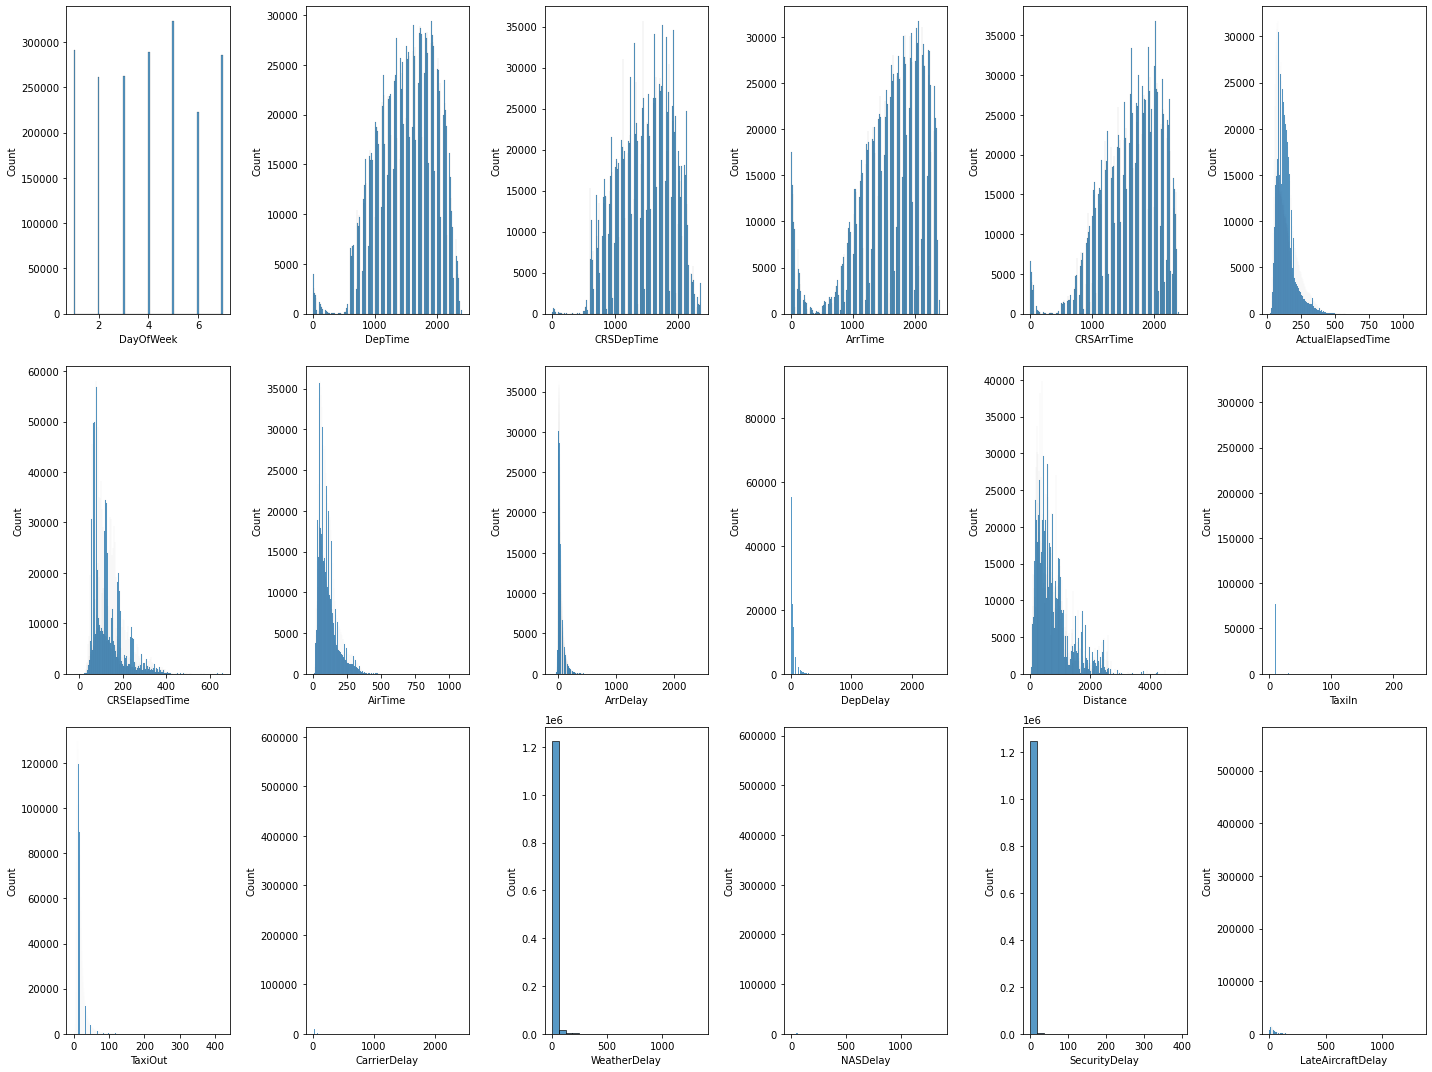

In [122]:
fig, axes = plt.subplots(rows, cols,figsize=(20,15))
axes = axes.flatten()

for i, attribute in enumerate(numeric_cols):
    sns.histplot(x=attribute, data=df, ax=axes[i])
plt.tight_layout()    
#plt.subplots_adjust(hspace=0.4)
plt.savefig("data_distribution.png",dpi=300)
plt.show()

<h4>Split Data</h4>

In [30]:
X_train,X_test = train_test_split(df, test_size=0.2, random_state=7)

In [31]:
X_train.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
471750,2008-03-02,7,2150.0,2140,2314.0,2305,WN,2206,N221WN,84.0,...,7.0,9.0,False,None,False,NaN,NaN,NaN,NaN,NaN
519941,2008-03-20,4,2109.0,1818,2317.0,2024,NW,1504,N750NW,128.0,...,11.0,22.0,False,None,False,11.0,0.0,2.0,0.0,160.0
980921,2008-06-25,3,1824.0,1645,2027.0,1844,US,409,N332AW,123.0,...,21.0,16.0,False,None,False,0.0,0.0,103.0,0.0,0.0
421146,2008-03-05,3,1751.0,1445,1908.0,1605,XE,3106,N13955,77.0,...,8.0,9.0,False,None,False,183.0,0.0,0.0,0.0,0.0
870133,2008-05-02,5,1200.0,1040,1648.0,1524,CO,40,N19141,228.0,...,18.0,24.0,False,None,False,80.0,0.0,4.0,0.0,0.0


In [32]:
X_test.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
262773,2008-02-10,7,2146.0,2140,2317.0,2314,UA,898,N585UA,91.0,...,6.0,13.0,False,None,False,NaN,NaN,NaN,NaN,NaN
612441,2008-04-17,4,1413.0,1346,1503.0,1435,YV,7307,N651ML,50.0,...,3.0,21.0,False,None,False,28.0,0.0,0.0,0.0,0.0
589522,2008-04-18,5,1251.0,1240,1510.0,1500,WN,387,N520SW,79.0,...,3.0,8.0,False,None,False,NaN,NaN,NaN,NaN,NaN
1160489,2008-07-27,7,2225.0,1904,202.0,2244,UA,1568,N494UA,157.0,...,4.0,29.0,False,None,False,0.0,54.0,0.0,0.0,144.0
1437292,2008-09-18,4,2114.0,2105,2143.0,2140,WN,496,N605SW,89.0,...,4.0,9.0,False,None,False,NaN,NaN,NaN,NaN,NaN


<h4>Data Visualization</h4>

100%|████████████████████████████████████████████| 3/3 [14:16<00:00, 285.50s/it]


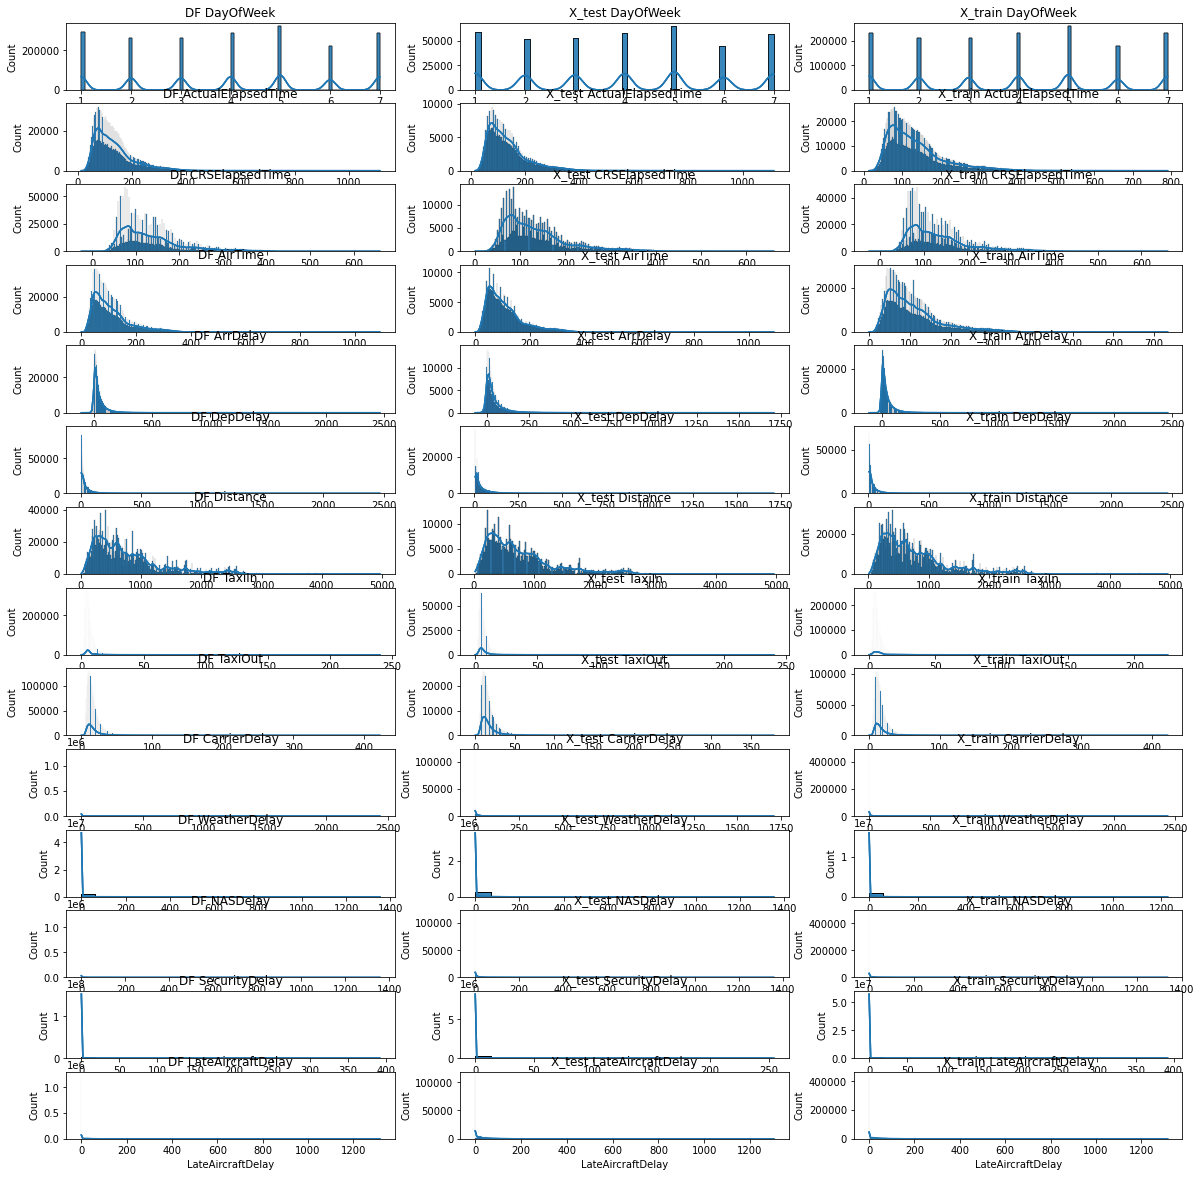

In [81]:
fig, axes = plt.subplots(numeric_cols.size, 3,figsize=(20,20))

for j,data in enumerate(tqdm.tqdm([df,X_test,X_train])):
    for i,cols in enumerate(tqdm.tqdm(numeric_cols)):
        sns.histplot(data= df, x= cols, kde=True, ax=axes[i,0])
        sns.histplot(data= X_test, x= cols, kde=True, ax=axes[i,1])
        sns.histplot(data= X_train, x= cols, kde=True, ax=axes[i,2])
        axes[i,0].set_title("DF " + str(cols))
        axes[i,1].set_title("X_test " + str(cols))
        axes[i,2].set_title("X_train " + str(cols))

plt.subplots_adjust(top=0.9)


plt.savefig("numeric_cols.png",dpi=300)

plt.show()

100%|████████████████████████████████████████████| 3/3 [15:31<00:00, 310.61s/it]


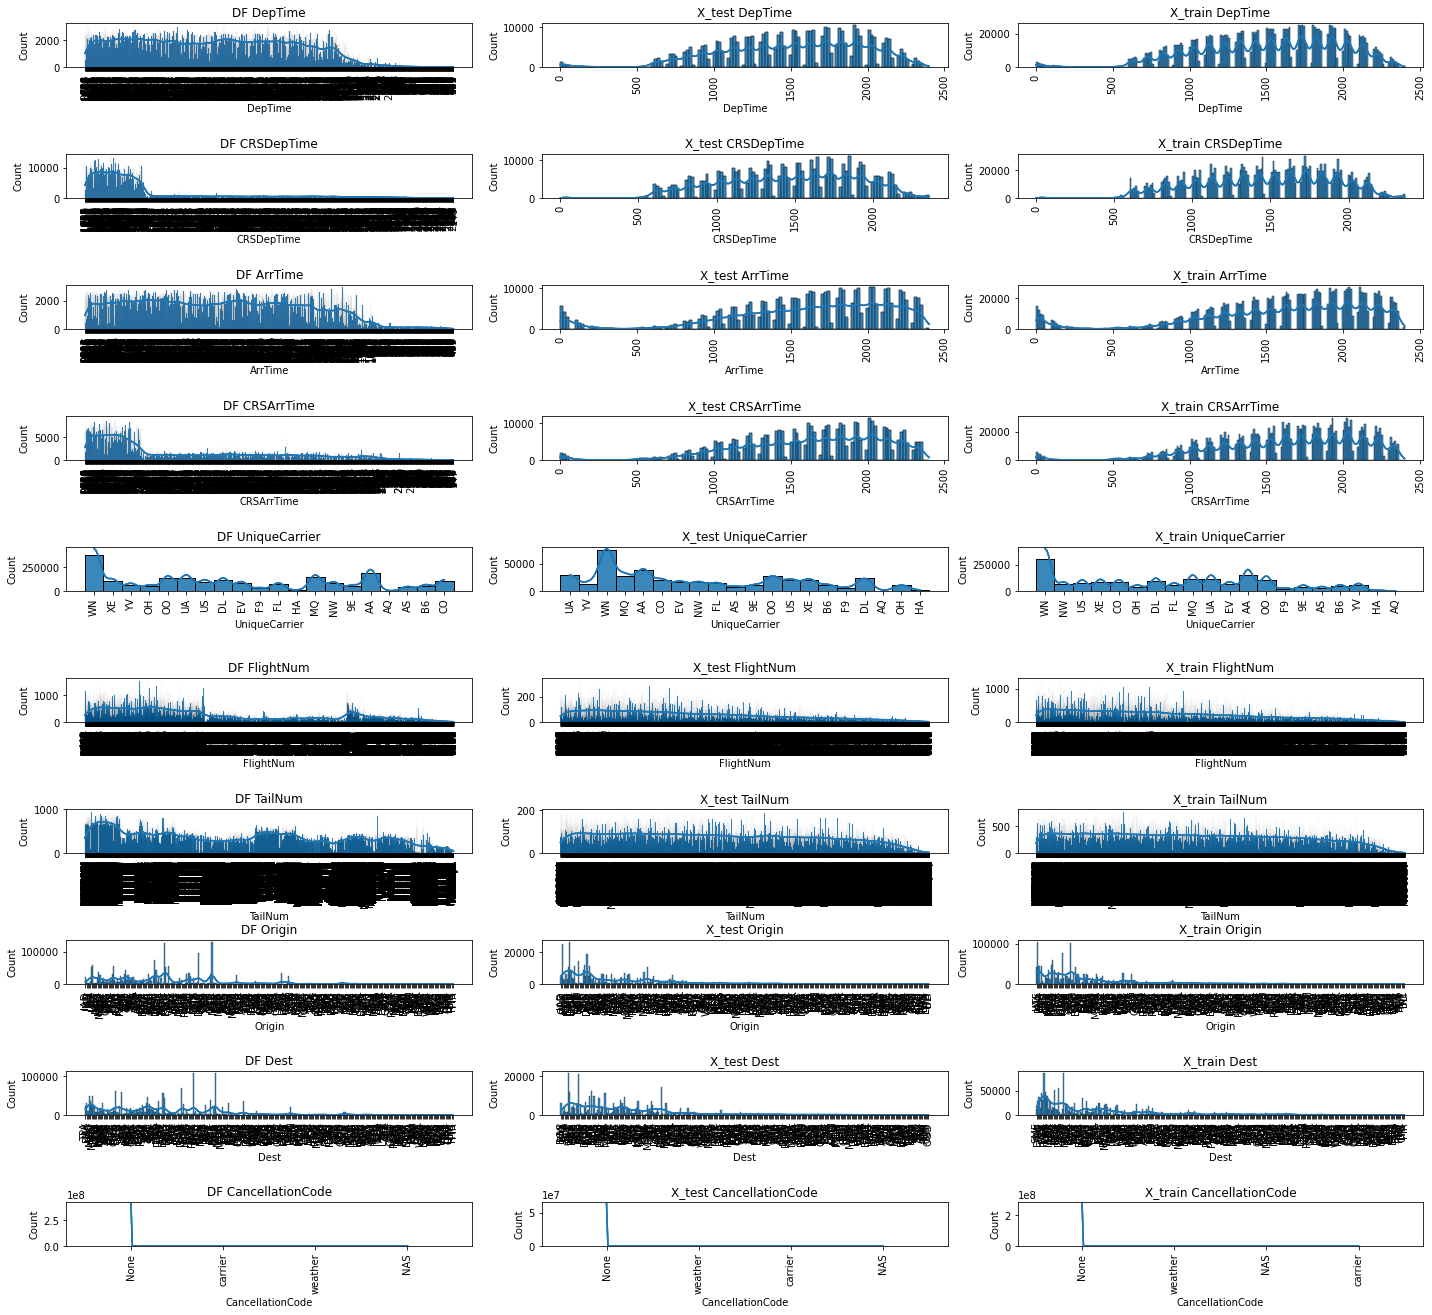

In [82]:
fig, axes = plt.subplots(categorical_cols.size, 3,figsize=(20,20))

for j,data in enumerate(tqdm.tqdm([df,X_test,X_train])):
    for i,cols in enumerate(tqdm.tqdm(categorical_cols)):
        sns.histplot(data= df, x= cols, kde=True, ax=axes[i,0])
        sns.histplot(data= X_test, x= cols, kde=True, ax=axes[i,1])
        sns.histplot(data= X_train, x= cols, kde=True, ax=axes[i,2])
        axes[i,0].set_title("DF " + str(cols))
        axes[i,1].set_title("X_test " + str(cols))
        axes[i,2].set_title("X_train " + str(cols))

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize = 10)
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("categorical_cols.png",dpi=300)

plt.show()

100%|█████████████████████████████████████████████| 3/3 [01:17<00:00, 25.98s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]


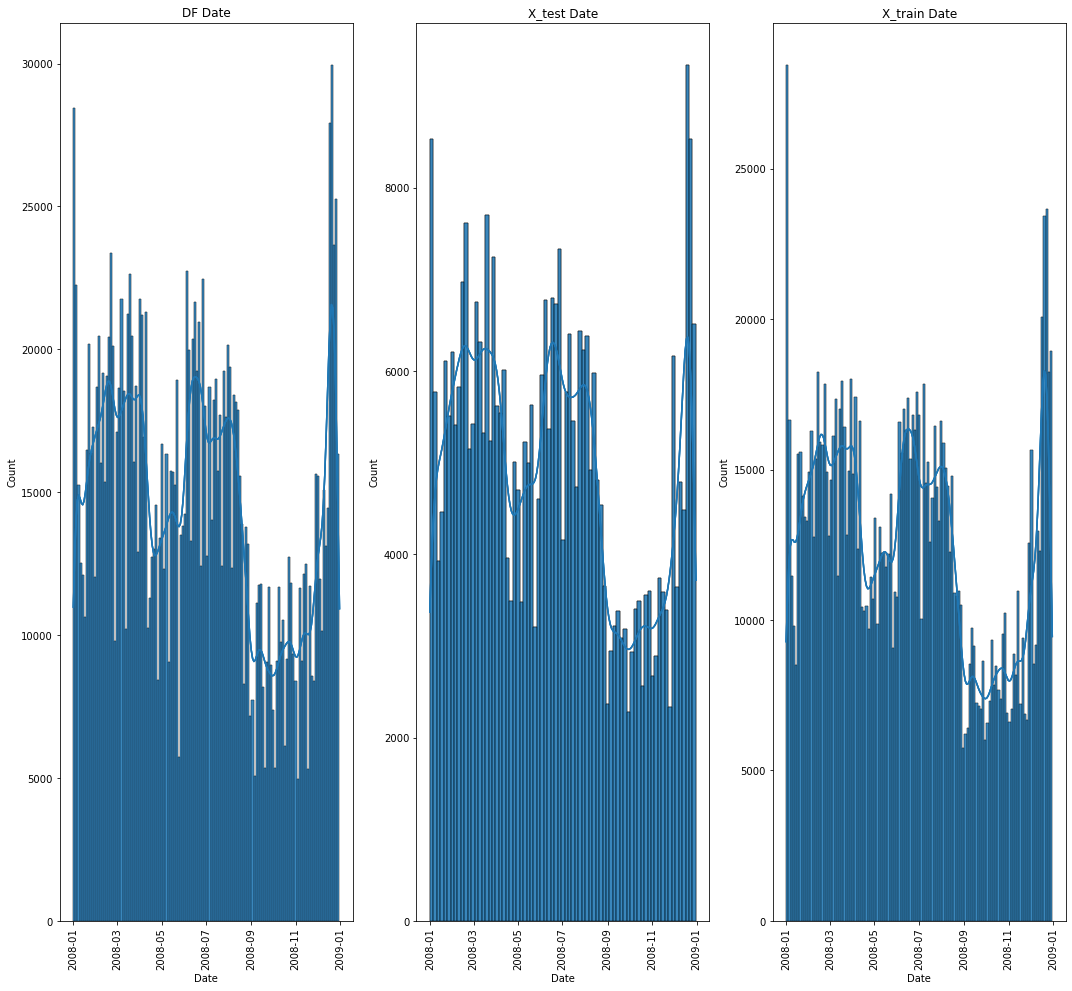

In [80]:
fig, axes = plt.subplots(1, 3,figsize=(15,15))

date_col = ["Date"]

for j,data in enumerate(tqdm.tqdm([df,X_test,X_train])):
    for i,cols in enumerate(tqdm.tqdm(date_col)):
        sns.histplot(data= df, x= cols, kde=True, ax=axes[0])
        sns.histplot(data= X_test, x= cols, kde=True, ax=axes[1])
        sns.histplot(data= X_train, x= cols, kde=True, ax=axes[2])
        axes[0].set_title("DF " + str(cols))
        axes[1].set_title("X_test " + str(cols))
        axes[2].set_title("X_train " + str(cols))

for ax in fig.axes:
    tqdm.tqdm(plt.sca(ax))
    tqdm.tqdm(plt.xticks(rotation=90,fontsize = 10))

fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("date_cols.png",dpi=300)

    
plt.show()

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.98it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]


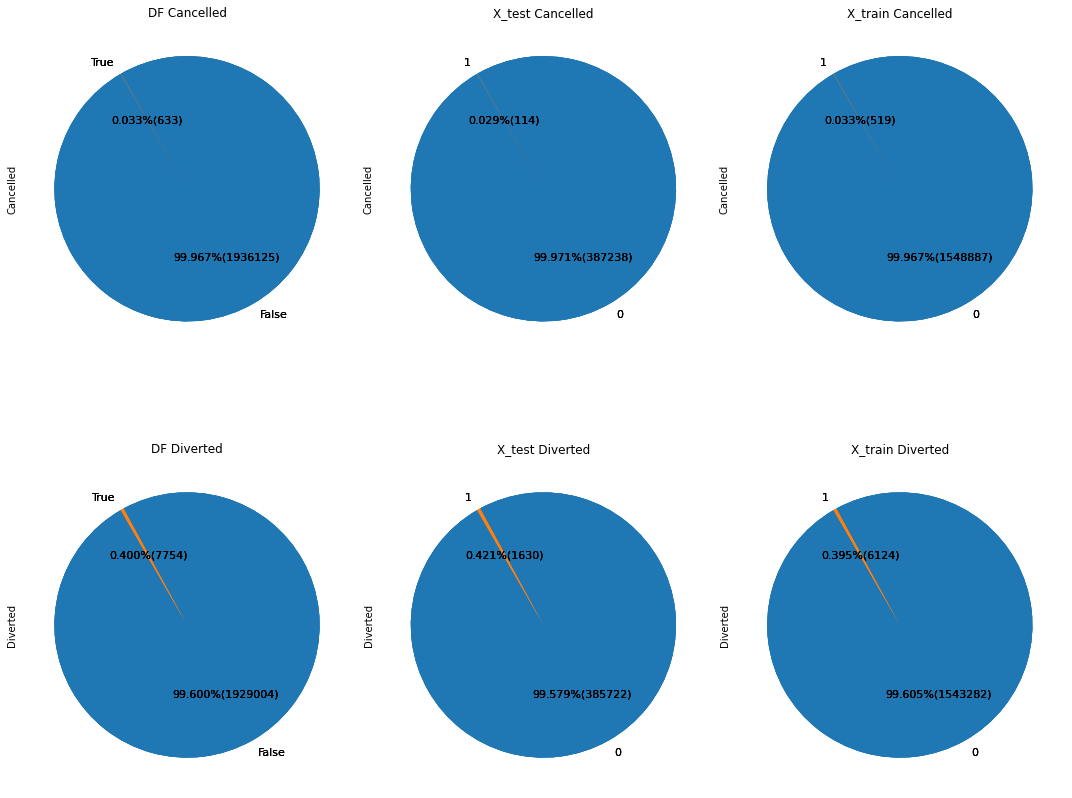

In [69]:
fig, axes = plt.subplots(boolean_cols.size, 3,figsize=(15,15))

for j,data in enumerate(tqdm.tqdm([df,X_test,X_train])):
    for i,cols in enumerate(tqdm.tqdm(boolean_cols)):
        df[cols].value_counts().plot.pie( autopct=lambda p:'{:.3f}%({:.0f})'.format(p,(p/100)*len(df[cols])), startangle = 120,ax = axes[i,0],textprops={'fontsize': 11})
        X_test[cols].value_counts().plot.pie( autopct=lambda p:'{:.3f}%({:.0f})'.format(p,(p/100)*len(X_test[cols])), startangle = 120,ax = axes[i,1],textprops={'fontsize': 11})
        X_train[cols].value_counts().plot.pie( autopct=lambda p:'{:.3f}%({:.0f})'.format(p,(p/100)*len(X_train[cols])), startangle = 120,ax = axes[i,2],textprops={'fontsize': 11})
        axes[i,0].set_title("DF " + str(cols))
        axes[i,1].set_title("X_test " + str(cols))
        axes[i,2].set_title("X_train " + str(cols))

for ax in fig.axes:
    tqdm.tqdm(plt.sca(ax))
    tqdm.tqdm(plt.xticks(rotation=90))

fig.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig("boolean_cols.jpg",dpi=300)
    
plt.show()

<h2>Level 2</h2>

<h3>Exercise 2</h3>

**Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).**

<h4>Input Data Values</h4>

In [34]:
#function to know which columns have nan values 
nan_list = []
def nan_function(df,lista):
    for i in df.columns:
        nan = df[i][df[i].isnull()]
        if nan.size != 0:
            print("The column {} does have NaN values".format(i))
            lista.append(i)
   

In [35]:
nan_function(df,nan_list)

The column ArrTime does have NaN values
The column TailNum does have NaN values
The column ActualElapsedTime does have NaN values
The column CRSElapsedTime does have NaN values
The column AirTime does have NaN values
The column ArrDelay does have NaN values
The column TaxiIn does have NaN values
The column TaxiOut does have NaN values
The column CarrierDelay does have NaN values
The column WeatherDelay does have NaN values
The column NASDelay does have NaN values
The column SecurityDelay does have NaN values
The column LateAircraftDelay does have NaN values


In [36]:
nan_list

['ArrTime',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'TaxiIn',
 'TaxiOut',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [37]:
#mode of elapsed time and arrive time 
mode_aet = df.ActualElapsedTime.mode()
mode_at = df["ArrTime"].mode()

print("ActualElapsedTime mode:{}".format(mode_aet))
print("ArrTime mode:{}".format(mode_at))

ActualElapsedTime mode:0    80.0
dtype: float64
ArrTime mode:0    2100.0
dtype: float64


I decide to input the missing values with the following methods:

ArrTime: DepTime + ArrTime.Mode <br>
TailNum: Mode <br>
ActualElapsedTime: AirTime+TaxiIn+TaxiOut <br>
CRSElapsedTime: CRSArrTime-CRSDepTime <br>
AirTime: Mean <br>
ArrDelay: Mean <br>
TaxiIn: Mean <br>
TaxiOut: Mean <br>
NASDelay: 0 <br>
SecurityDelay: 0 <br>
LateAircraftDelay: 0 <br>

<h5>Impute ArrTime</h5>

In [38]:
#imputate the missing Arrtimes values with the elapsed time mode value
df["ArrTime"]= np.where(df["ArrTime"].isnull(),df["DepTime"]+100,df["ArrTime"])

<h5>Imputation with sklear</h5>

In [39]:
#define the programa tu data imputation with sklearn
def input_data_imputer(df,col,imputation):
    for i in df:
        for j in col:
            i[[j]] = SimpleImputer(strategy=imputation).fit_transform(i[[j]])    

In [40]:
#define the columns and dataframe with the columns to impute
df_list = [df,X_train,X_test]
mode_imputation = ["TailNum"]
mean_imputation = ["AirTime","ArrDelay","TaxiIn","TaxiOut"]
fill_nan_zero = ["WeatherDelay","CarrierDelay","NASDelay","SecurityDelay","LateAircraftDelay"]                                                                                         

In [41]:
#run the sklearn function with the type of imputation for missing values  
input_data_imputer(df_list,mean_imputation,"mean")
input_data_imputer(df_list,mode_imputation,"most_frequent")

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [42]:
#impute nan with zeros
for i in fill_nan_zero:
    df[i] = df[i].fillna(0)

In [43]:
#refresh the list of columns with NaNs values
new_nan_list = []
nan_function(df,new_nan_list)

The column ActualElapsedTime does have NaN values
The column CRSElapsedTime does have NaN values


<h5>Impute ActualElapsedtime</h5>

In [44]:
#The Actual elapsed time of the aircraft is the summatory of the AirTime,TaxiIn and TaxiOut
imput_ActualElapsedTime = df["AirTime"] + df["TaxiIn"] + df["TaxiOut"]

In [45]:
#replace the nan value of ActualElapseTime with the input vale 
df["ActualElapsedTime"]= np.where(df["ActualElapsedTime"].isnull(),imput_ActualElapsedTime,df["ActualElapsedTime"])

<h5>Transform Data values</h5>

In [46]:
df = df.astype({"DepTime":"int64","ArrTime":"int64"})

<h5>Impute Datetime</h5>

In [47]:
#remaining columns with missing values
date_cols = ["DepTime","ArrTime","CRSArrTime","CRSDepTime"]

In [48]:
#there is a problem with convert the int to time , the 2400 is not valid, 
#so is necessary to change the value from 24000 to 0000
for col in date_cols:
    for i,value in enumerate(df[col]):
        if value >= 2400:
            df[col] = df[col].apply(lambda x: (x-2400) if (x>=2400) else x )                                                                                                                                                                                                                                              

In [49]:
#define the program to change the int to str
def convertColsToString(df,listcol):
    for i in listcol:
        df[i] = df[i].astype(str)

In [50]:
#run the program to convert the int to string 
convertColsToString(df,date_cols)

In [51]:
#we need to add the ":" to the string to format it to time format string, e.g 1020 to 10:20  
def converStrIntToTimeFormat(df,col,lista):
    for t in df[col]:
        if len(t) == 4 :
            time = t[:2] + ':' + t[2:]
            lista.append(time)
        elif len(t) == 3:
            time = str(0) + t[:1] + ':' + t[1:]
            lista.append(time)
        elif len(t) == 2:
            time = str(0) + str(0) + ':' + t[0:]
            lista.append(time) 
        else  :
            time = str(0) + str(0) + ':' + t[0:]
            lista.append(time)     
#return lista 

In [52]:
#function to convert the string time format to datatime
def string_to_time(stringtime,lista):
    for st in stringtime:
        t = datetime.strptime(st,'%H:%M').time()
        lista.append(t)
        

In [53]:
#function to calculate the difference of time for the actualElapsedTime
#in the second part there are values on the original DF that are strange
#from the same observation e.g., DepTime: 10:20, ArrTime: 11:30, 
#CRSDepTime: 10:20, CRSArrTime:10:10
#so exist a inconsistency the values. So if the value is over a range
#the value taken is the ActualElapsedTime
def difference_of_time(listaInicio,listaFinal,totallista):
    for i,(li,lf) in  enumerate(zip(listaInicio,listaFinal)):
        if li < lf :
            t =  ((datetime.strptime(lf,'%H:%M') - 
               datetime.strptime(li,'%H:%M')).total_seconds())/60
            totallista.append(t)
        else:
            t =  ((datetime.strptime(lf,'%H:%M')+timedelta(1)) - 
               datetime.strptime(li,'%H:%M')).total_seconds()/60
            if t <=300: 
                totallista.append(t)
            else: 
                totallista.append(df["ActualElapsedTime"].iloc[i])

In [54]:
#convert the list to df
def time_to_dataframe(lista):
    return pd.DataFrame(lista)
    

In [55]:
#create the list with columns  
list_CrsDepTime = []
list_CrsArrTime = []
list_DepTime = []
list_ArrTime = []

In [56]:
#list of list of the columns
list_of_list_str_time = [list_DepTime,list_ArrTime,list_CrsArrTime,list_CrsDepTime]

In [57]:
#convert the values from string (2400) to time format (24:00) 
for col,l in zip(date_cols,list_of_list_str_time):
    converStrIntToTimeFormat(df,col,l)

In [58]:
#create list for the time values  
lista_string_crsdep_time = []
lista_string_crs_arr_time = []
lista_string_dep_time = []
lista_string_arr_time = []

In [59]:
#list of list for the time values
lista_of_list__time = [lista_string_dep_time,
lista_string_arr_time,
lista_string_crs_arr_time,lista_string_crsdep_time]

In [60]:
#run the function for strong to time values
for i,j in zip(list_of_list_str_time,lista_of_list__time):
        string_to_time(i,j)

In [61]:
#remplace the times values to the df
for col,lista in zip(date_cols,lista_of_list__time):
    df[col] = time_to_dataframe(lista) 

In [64]:
#run the function to calculate the elapsedTime
lista_crsElapsedTime = []
difference_of_time(list_CrsDepTime,list_CrsArrTime,lista_crsElapsedTime)

In [65]:
#line to replace the missing values of the CRSElapsedTime 
df["CRSElapsedTime"]= np.where(df["CRSElapsedTime"].isnull(),lista_crsElapsedTime,df["CRSElapsedTime"])

<h5>Get Dummies</h5> 

In [66]:
#function to get dummies

def get_dummies(df,col):
    return pd.get_dummies(df[col])

In [67]:
#function to concat dummies

def concat_dummies(df,dummie):
    return pd.concat([df,dummie],axis=1)

In [68]:
#get dummies from the cancellation codes

cancellation_col = "CancellationCode"

cancelation_codes_dummies_df= get_dummies(df,cancellation_col) 
cancelation_codes_dummies_df 

,NAS,None,carrier,weather
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1936753,0,1,0,0
1936754,0,1,0,0
1936755,0,1,0,0
1936756,0,1,0,0


In [69]:
#get dummies from the unique carriers
UniqueCarrier_col = "UniqueCarrier"

UniqueCarrier_dummies_df= get_dummies(df,UniqueCarrier_col) 
UniqueCarrier_dummies_df 

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936754,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#concat the dummies to the main DF
df = concat_dummies(df,cancelation_codes_dummies_df)
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NAS,None,carrier,weather
0,2008-01-03,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,N712SW,128.0,...,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,2008-01-03,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,N772SW,128.0,...,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,2008-01-03,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,N428WN,96.0,...,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,2008-01-03,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,N464WN,90.0,...,False,2.0,0.0,0.0,0.0,32.0,0,1,0,0
4,2008-01-03,4,19:40:00,19:15:00,21:21:00,21:10:00,WN,378,N726SW,101.0,...,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008-12-13,6,12:50:00,12:20:00,16:17:00,15:52:00,DL,1621,N938DL,147.0,...,False,3.0,0.0,0.0,0.0,22.0,0,1,0,0
1936754,2008-12-13,6,06:57:00,06:00:00,09:04:00,07:49:00,DL,1631,N3743H,127.0,...,False,0.0,57.0,18.0,0.0,0.0,0,1,0,0
1936755,2008-12-13,6,10:07:00,08:47:00,11:49:00,10:10:00,DL,1631,N909DA,162.0,...,False,1.0,0.0,19.0,0.0,79.0,0,1,0,0
1936756,2008-12-13,6,12:51:00,12:40:00,14:46:00,14:37:00,DL,1639,N646DL,115.0,...,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [71]:
#concat the dummies to the main DF
df = concat_dummies(df,UniqueCarrier_dummies_df)
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008-01-03,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,N712SW,128.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-01-03,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,N772SW,128.0,...,0,0,0,0,0,0,0,1,0,0
2,2008-01-03,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,N428WN,96.0,...,0,0,0,0,0,0,0,1,0,0
3,2008-01-03,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,N464WN,90.0,...,0,0,0,0,0,0,0,1,0,0
4,2008-01-03,4,19:40:00,19:15:00,21:21:00,21:10:00,WN,378,N726SW,101.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008-12-13,6,12:50:00,12:20:00,16:17:00,15:52:00,DL,1621,N938DL,147.0,...,0,0,0,0,0,0,0,0,0,0
1936754,2008-12-13,6,06:57:00,06:00:00,09:04:00,07:49:00,DL,1631,N3743H,127.0,...,0,0,0,0,0,0,0,0,0,0
1936755,2008-12-13,6,10:07:00,08:47:00,11:49:00,10:10:00,DL,1631,N909DA,162.0,...,0,0,0,0,0,0,0,0,0,0
1936756,2008-12-13,6,12:51:00,12:40:00,14:46:00,14:37:00,DL,1639,N646DL,115.0,...,0,0,0,0,0,0,0,0,0,0


<h5> Add new feature Status </h5>

In [73]:
#create a new column with the flight status based in the ActualElapsedTime and 
#CRSElapsedTime 
df["Status"] = np.where(df["ActualElapsedTime"] <= df["CRSElapsedTime"],"OnTime","Delayed")    

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,MQ,NW,OH,OO,UA,US,WN,XE,YV,Status
0,2008-01-03,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,N712SW,128.0,...,0,0,0,0,0,0,1,0,0,OnTime
1,2008-01-03,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,N772SW,128.0,...,0,0,0,0,0,0,1,0,0,OnTime
2,2008-01-03,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,N428WN,96.0,...,0,0,0,0,0,0,1,0,0,Delayed
3,2008-01-03,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,N464WN,90.0,...,0,0,0,0,0,0,1,0,0,OnTime
4,2008-01-03,4,19:40:00,19:15:00,21:21:00,21:10:00,WN,378,N726SW,101.0,...,0,0,0,0,0,0,1,0,0,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008-12-13,6,12:50:00,12:20:00,16:17:00,15:52:00,DL,1621,N938DL,147.0,...,0,0,0,0,0,0,0,0,0,OnTime
1936754,2008-12-13,6,06:57:00,06:00:00,09:04:00,07:49:00,DL,1631,N3743H,127.0,...,0,0,0,0,0,0,0,0,0,Delayed
1936755,2008-12-13,6,10:07:00,08:47:00,11:49:00,10:10:00,DL,1631,N909DA,162.0,...,0,0,0,0,0,0,0,0,0,Delayed
1936756,2008-12-13,6,12:51:00,12:40:00,14:46:00,14:37:00,DL,1639,N646DL,115.0,...,0,0,0,0,0,0,0,0,0,OnTime


In [92]:
df.DepTime.iloc[124]

datetime.time(19, 3)

In [ ]:
df.to_csv("DelayedFlightsUpdated.csv",index=False)

<h2>Level 3</h2>

<h3>Exercise 3</h3>

**Summarizes the new statistically and graphically generated columns**

<h4>Correlation between the columns</h4>

In [74]:
#function to plot a matrix plot 
def matrix_plot (df,name):

    fig, ax = plt.subplots(figsize=(15, 15))

# Data
    corr_matrix= df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
    half_matrix = np.triu(corr_matrix)

# Heatmap Matrix
    sns.heatmap(corr_matrix, annot=True, mask = half_matrix, cmap=sns.color_palette("coolwarm", as_cmap=True),annot_kws = {"size": 10})
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,horizontalalignment = 'right',)
    ax.set_yticklabels(ax.get_yticklabels(),rotation = 0,horizontalalignment = 'right',)
    ax.tick_params(labelsize = 15)
    fig.suptitle(name, fontsize = 13, fontweight = "bold")
    plt.savefig(name + ".png",dpi=300)
    plt.show()
    

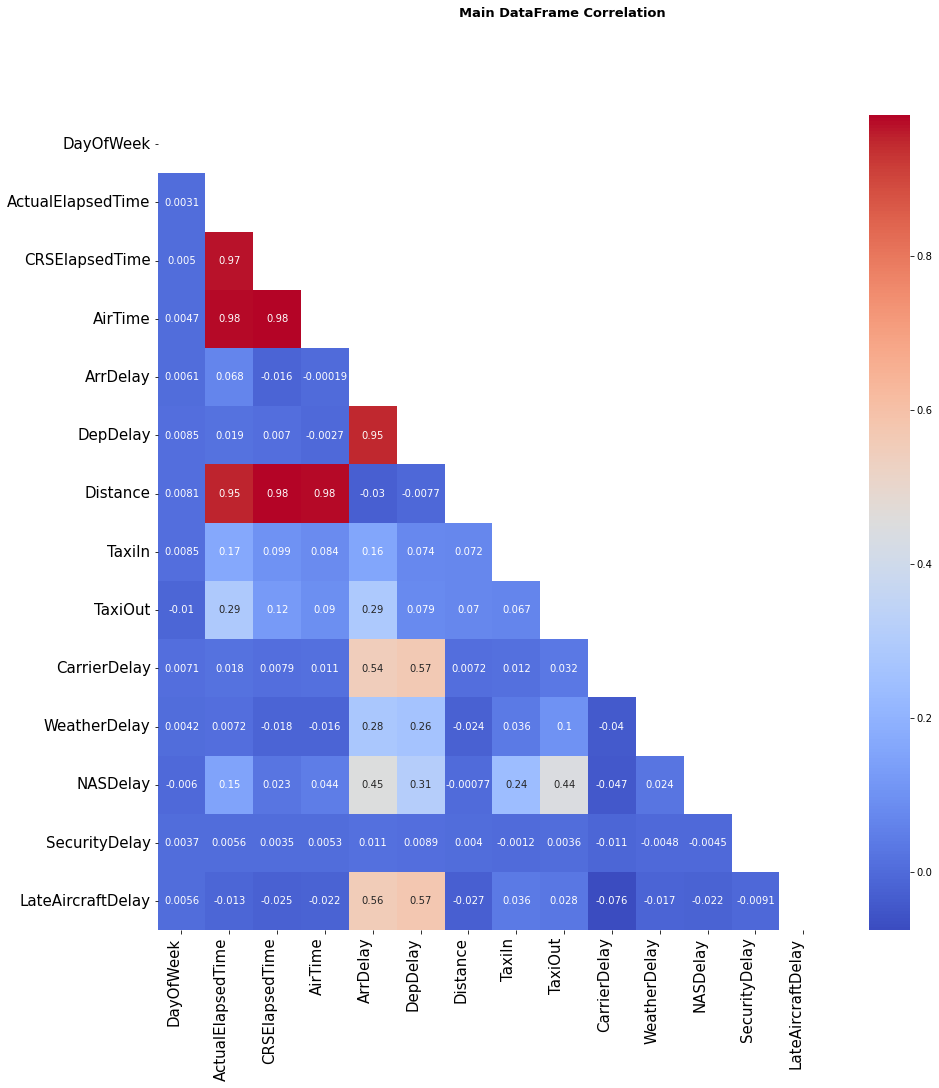

In [75]:
matrix_plot (df,"Main DataFrame Correlation")

<h4>Departures time plot</h4>

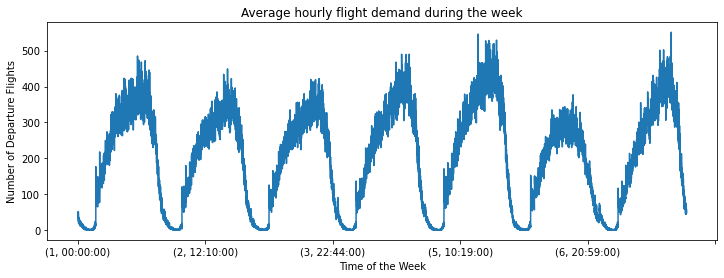

In [87]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_dates.groupby(["DayOfWeek",df_dates['depDate'].dt.time]).count()["Date"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly flight demand during the week",
    xlabel="Time of the Week",
    ylabel="Number of Departure Flights",
)
plt.savefig("flight_demand_by_hour.png",dpi=300)
plt.show()


The plot show that a large part of the departure flights occur in the evening. The amount of flights increse in Thursday, Friday and Monday, and the least amount flights occur at Saturday.      

<h4>Status flight</h4>

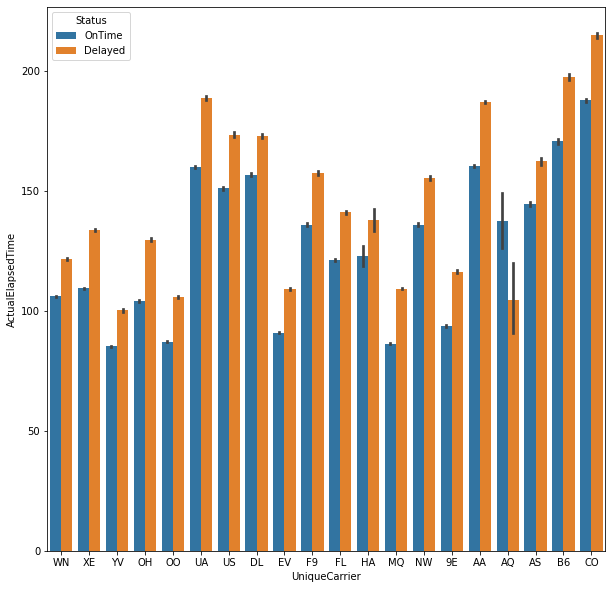

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df, x="UniqueCarrier", y= "ActualElapsedTime", hue="Status")
plt.savefig("status_flight.png",dpi=300)
plt.show()

The graph shows that all airlines are delayed except for AQ that show more OnTime flights than Delayed. 

<h4>Cancellation codes plot</h4>

In [72]:
#concat the dummies to a dummy DF
df_dummies = concat_dummies(UniqueCarrier_dummies_df,cancelation_codes_dummies_df)
df_dummies

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,OO,UA,US,WN,XE,YV,NAS,None,carrier,weather
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1936754,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1936755,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1936756,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
#group by the cancellation codes by carriers
carrier_cols = ['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']
plot_df = df_dummies.groupby(carrier_cols).count()
plot_df

NAS    None  \
9E AA AQ AS B6 CO DL EV F9 FL HA MQ NW OH OO UA US WN XE YV                   
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1    67063   67063   
                                                      1  0   103663  103663   
                                                   1  0  0   377602  377602   
                                                1  0  0  0    98425   98425   
                                             1  0  0  0  0   141426  141426   
                                          1  0  0  0  0  0   132433  132433   
                                       1  0  0  0  0  0  0    52657   52657   
                                    1  0  0  0  0  0  0  0    79108   79108   
                                 1  0  0  0  0  0  0  0  0   141920  141920   
                              1  0  0  0  0  0  0  0  0  0     7490    7490   
                           1  0  0  0  0  0  0  0  0  0  0    71284   71284   
                        1  0  0  0  0  0  0  0  0  0  0  0    28269   28269   
                     1  0  0  0  0  0  0  0  0  0  0  0  0    81877   81877   
                  1  0  0  0  0  0  0  0  0  0  0  0  0  0   114238  114238   
               1  0  0  0  0  0  0  0  0  0  0  0  0  0  0   100195  100195   
            1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0    55315   55315   
         1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0    39293   39293   
      1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0      750     750   
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   191865  191865   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0    51885   51885   

                                                             carrier  weather  
9E AA AQ AS B6 CO DL EV F9 FL HA MQ NW OH OO UA US WN XE YV                    
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1     67063    67063  
                                                      1  0    103663   103663  
                                                   1  0  0    377602   377602  
                                                1  0  0  0     98425    98425  
                                             1  0  0  0  0    141426   141426  
                                          1  0  0  0  0  0    132433   132433  
                                       1  0  0  0  0  0  0     52657    52657  
                                    1  0  0  0  0  0  0  0     79108    79108  
                                 1  0  0  0  0  0  0  0  0    141920   141920  
                              1  0  0  0  0  0  0  0  0  0      7490     7490  
                           1  0  0  0  0  0  0  0  0  0  0     71284    71284  
                        1  0  0  0  0  0  0  0  0  0  0  0     28269    28269  
                     1  0  0  0  0  0  0  0  0  0  0  0  0     81877    81877  
                  1  0  0  0  0  0  0  0  0  0  0  0  0  0    114238   114238  
               1  0  0  0  0  0  0  0  0  0  0  0  0  0  0    100195   100195  
            1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     55315    55315  
         1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     39293    39293  
      1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0       750      750  
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0    191865   191865  
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     51885    51885

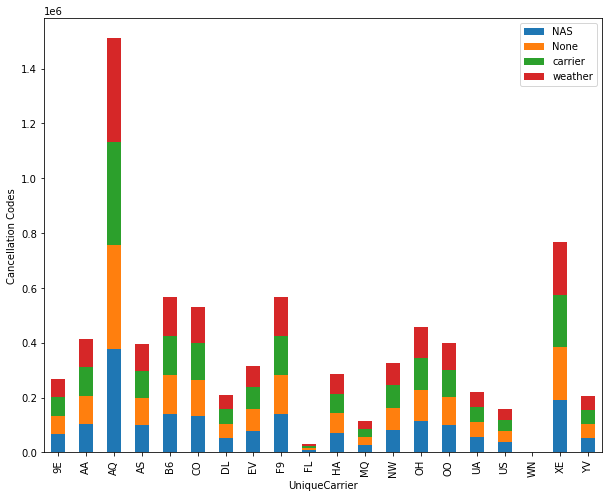

In [79]:
fig = plot_df.plot(kind='bar', stacked=True,figsize=(10,8))
plt.xlabel("UniqueCarrier")
fig.set_xticklabels(carrier_cols)
plt.ylabel('Cancellation Codes')
plt.savefig("stacked_cancellation_codes.png",dpi=300)
plt.show()

All airlines have the same amount of cancellation codes, None is the larger code, AQ is the airline with most cancelation codes and FL the less. 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 52 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DayOfWeek          int64         
 2   DepTime            object        
 3   CRSDepTime         object        
 4   ArrTime            object        
 5   CRSArrTime         object        
 6   UniqueCarrier      object        
 7   FlightNum          object        
 8   TailNum            object        
 9   ActualElapsedTime  float64       
 10  CRSElapsedTime     float64       
 11  AirTime            float64       
 12  ArrDelay           float64       
 13  DepDelay           float64       
 14  Origin             object        
 15  Dest               object        
 16  Distance           int64         
 17  TaxiIn             float64       
 18  TaxiOut            float64       
 19  Cancelled          bool          
 20  CancellationCode   objec